# Redes Bayesianas (Naive Bayes)

## Ejercicio 1: Clasificación diabetes

### Cargar librerías y dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/naive_bayes_diabetes.csv", encoding='utf-8')

### Conocer la data

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   glucosa            995 non-null    int64
 1   presion_sanguinea  995 non-null    int64
 2   diabetes           995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [5]:
diabetes.describe()

glucosa  presion_sanguinea    diabetes
count  995.000000         995.000000  995.000000
mean    44.306533          79.184925    0.500503
std      6.707567           9.340204    0.500251
min     20.000000          50.000000    0.000000
25%     40.000000          72.000000    0.000000
50%     45.000000          80.000000    1.000000
75%     50.000000          87.000000    1.000000
max     70.000000         100.000000    1.000000

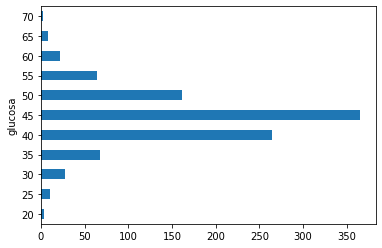

In [8]:
diabetes.groupby('glucosa').size().plot.barh()

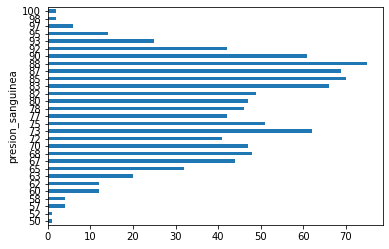

In [9]:
diabetes.groupby('presion_sanguinea').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


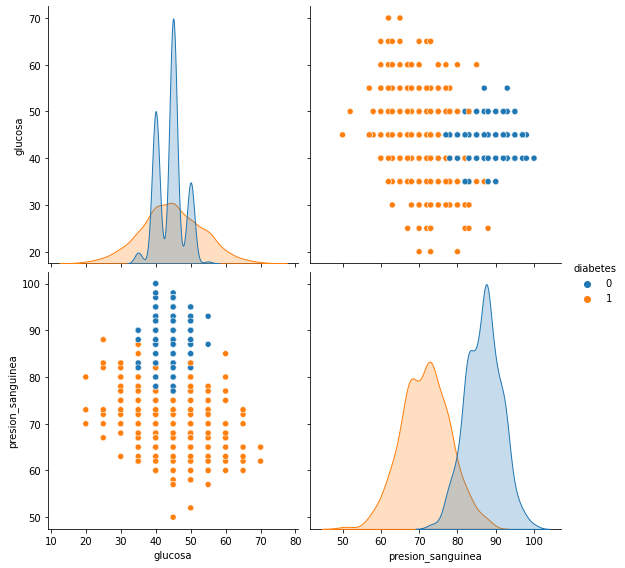

In [11]:
sns.pairplot(diabetes, hue='diabetes', size=4, vars=['glucosa', 'presion_sanguinea'], kind='scatter')

### Separar la data

In [12]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Construir el modelo

In [17]:
naba = GaussianNB()
naba.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_predict = naba.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.5f' % (accuracy*100))

Accuracy: 93.31104


## Ejercicio 2: Clasificación de vinos

### Cargar librerías y dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine

### Conocer la data

In [30]:
print(load_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [31]:
load_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
load_wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [33]:
load_wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [34]:
load_wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Convertir la data a un DataFrame de pandas

In [41]:
vino = pd.DataFrame(load_wine.data, columns=load_wine.feature_names)
vino['wine_class'] = load_wine.target

In [42]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [43]:
vino.describe()

alcohol  malic_acid  ...      proline  wine_class
count  178.000000  178.000000  ...   178.000000  178.000000
mean    13.000618    2.336348  ...   746.893258    0.938202
std      0.811827    1.117146  ...   314.907474    0.775035
min     11.030000    0.740000  ...   278.000000    0.000000
25%     12.362500    1.602500  ...   500.500000    0.000000
50%     13.050000    1.865000  ...   673.500000    1.000000
75%     13.677500    3.082500  ...   985.000000    2.000000
max     14.830000    5.800000  ...  1680.000000    2.000000

[8 rows x 14 columns]

In [44]:
vino.head()

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  wine_class
0    14.23        1.71  2.43  ...                          3.92   1065.0           0
1    13.20        1.78  2.14  ...                          3.40   1050.0           0
2    13.16        2.36  2.67  ...                          3.17   1185.0           0
3    14.37        1.95  2.50  ...                          3.45   1480.0           0
4    13.24        2.59  2.87  ...                          2.93    735.0           0

[5 rows x 14 columns]

### Gráfica de los datos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


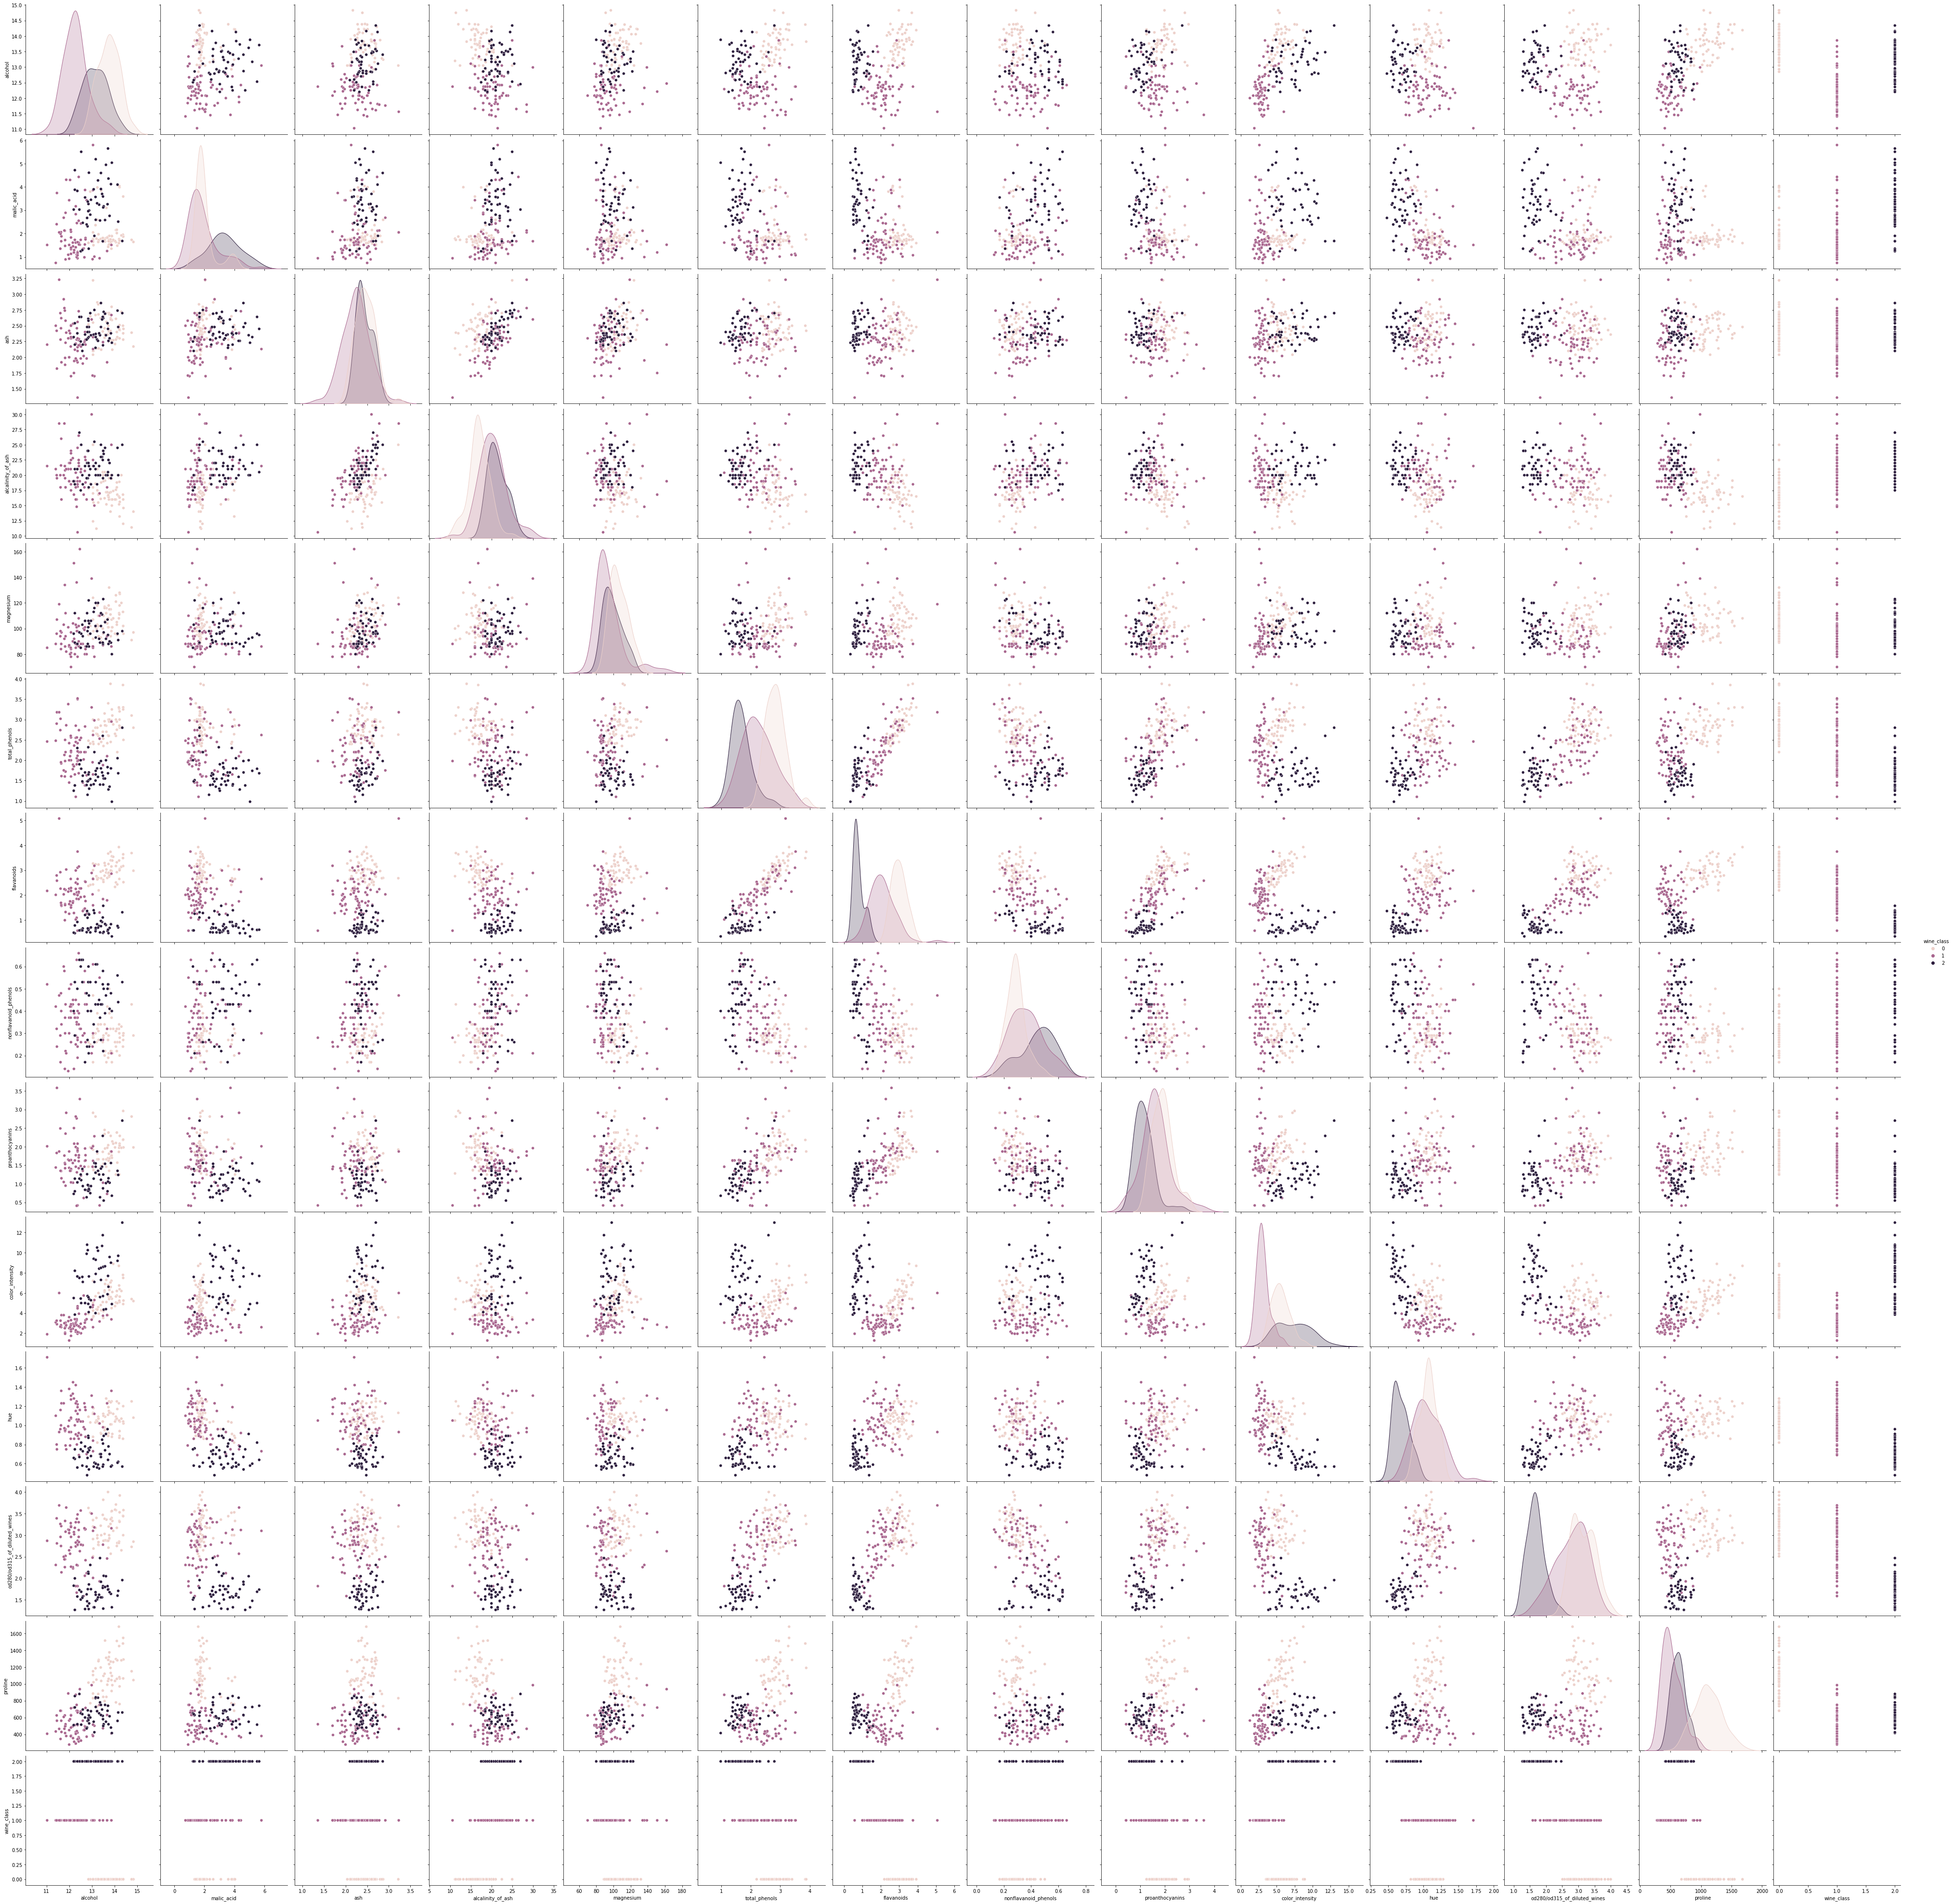

In [45]:
sns.pairplot(vino, hue='wine_class', size=4, vars=vino.columns, kind='scatter')

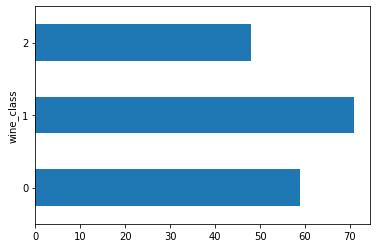

In [46]:
vino.groupby('wine_class').size().plot.barh()

### Separar los datos

In [53]:
X = vino.drop('wine_class', axis=1)
y = vino['wine_class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

### Instanciar el algoritmo

In [58]:
naba_wine = GaussianNB()
naba_wine.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_predict = naba_wine.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.5f' % (accuracy*100))

Accuracy: 90.74074
